# Regressione Lineare 

Questo metodo di statistical learning si usa per predire una variabile di output **quantitativa**.
Benché sia un metodo molto vecchio e molto consolidato, non solo la regressione lineare è ancora ampiamente utilizzata in task reali, ma la sua rilevanza è dovuta al fatto che molti metodi di statistical learning più avanzati sono di fatto generalizzazioni della Regressione Lineare.

Iniziamo con una introduzione molto graduale alla regressione lineare.

In generale la Regressione Lineare consiste nell'inferire la relazione tra la variabile di output continua $Y$ e una variabile di input $X$ attraverso la stima dei parametri $\beta_0$ e $\beta_1$. Considerando inoltre che le misure possono essere affette errore $\epsilon$, cioè:

\begin{equation}
Y = \beta_0 + \beta_1 X + \epsilon
\end{equation}

Questi parametri non sono noti a priori e si stimano dai dati empirici a disposizione ottimizzando una opportuna funzione di loss che, minimizzata, porterà a una stima numerica dei parametri del modello.

# Regressione - setting matematico

Col termine **regressione** ci si riferisce a un insieme di tecniche di **supervised learning** dove l'obiettivo è predire una variabile di output quantitativa $y \in \mathbb{R}$ dato un vettore di $p$ features $\mathbf{x} = (x_1,...,x_p)$; ognuna delle features può essere sia continua che categorica (discreta). Poiché una relazione analitica in forma chiusa tra $\mathbf{x}$ e y non è nota, si imposta questo problema dal punto di vista della statistica.

Quindi, l'obiettivo della regressione é: trovare una funzione che approssimi il meglio possibile l'output random $Y$ dato come input il vettore random $\mathbf{X}$. In generale la relazione che lega $\mathbf{x}$ a y **non è nota**, ma si ha un training set - cioè un insieme di esempi ordinati input output - che può essere pensato come un sample - pescato in maniera i.i.d in un ensemble di copie del training set - di un random training set: $T = \{(\mathbf{X}_1, Y_1),...,(\mathbf{X}_n, Y_n)\}$.

Si parte allora dal training set $\tau = \{(\mathbf{x}_1, y_1),...,(\mathbf{x}_n, y_n)\}$, dove ogni coppia ordinata rappresenta una osservazione con $\mathbf{x}_i$ che è una istanza delle variabili di input, e $y_i$ è la corrispondente istanza della variabile di output - le labels - che vogliamo predire. 

Una volta che si sceglie come **loss function** una funzione di errore quadratica della forma:
$$
L(y, \hat{y}) = (y - \hat{y})^2
$$

si dimostra che la funzione di predizione migliore $g^{*}(\mathbf{x})$ si trova minimizzando la funzione di rischio $l(g)$, definita come il valore atteso della funzione di loss:
$$
l(g) = \mathbb{E}(L(Y, g(\mathbf{X}))
$$

che per la funzione di loss quadratica altro non è che il valore atteso di condizionato di $Y$ dato il vettore delle features $\mathbf{x}$:
$$
g(\mathbf{x})^{*} = \mathbb{E}(Y|\mathbf{X} = \mathbf{x})
$$

Questa funzione va stimata a partire dal training set $\tau$, allenando il modello sugli esempi a disposizione, cioè minimizzando la funzione di loss empirica:
\begin{equation}
l_\tau(g) = \dfrac{1}{n} \sum_{i=1}^{n}(y_i - g(\mathbf{x}_i))^{2}
\end{equation}
la funzione che minimizza la loss function nella fase di training, viene detta **learner**.

Poiché si assume che i valori assunti dalla variabile di output siano condizionati da quelli assunti dalla variabile di input, si può scrivere che:

\begin{equation}
Y_i = g(\mathbf{x}_i) + \epsilon_i
\end{equation}
con: $\mathbb{E}\epsilon = 0$ e Var$(\epsilon_i) = \sigma^2$.

Quindi il problema di stimare il learner ottimo da una generica classe di funzioni è ricondotto a:
1. Fissare un modello che dipenda da un set di parametri $\mathbf{\beta}$
2. Ammettere che i dati siano affetti da un rumore casuale $\epsilon$
3. Decidere la forma funzionale esplicita di $g(\mathbf{x}|\mathbf{\beta})$
4. Trovare una stima numerica del vettore dei parametri $\mathbf{\beta}$ **minimizzando la loss empirica** attraverso il **metodo dei minimi quadrati**

Nel caso della regressione lineare si ipotizza per il learner una forma: $g = \beta_0 + \beta_1 x$, e si minimizzerà la somma dei residui al quadrato, cioè: $(y-\hat{y}_i)^2$ con $\hat{y}_i = \beta_0 + \beta_1 x_i$, minimizzare la funzione di loss empirica equivale a minimizzare la somma:

$$
\mbox{min}_{\beta_0, \beta_1 \in \mathbb{R}} \left\{ \dfrac{1}{n} \sum_{i=1}^{n}(y_i - (\beta_0 + \beta_1 x_i))^{2}\right\}
$$

Pertanto un modello di regressione lineare con $p$ features, sarà scritto come:
$$
Y_i = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p + \epsilon_i
$$

# Dati

Per studiare la regressione tramite un approccio learning-by-doing consideriamo i dati dal libro Introduction to Statistical Learning with R. 

Questi dati rappresentano le vendite di un certo prodotto come funzione del budget allocato in un certo mezzo d'informazione

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
# data
df = pd.read_csv("C:/Users/carus/Documents/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Domanda**: esiste una relazione che lega la **spesa totale** alle vendite?

In [4]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df["spesa_totale"] = df["TV"] + df["radio"] + df["newspaper"]

In [6]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales', 'spesa_totale'], dtype='object')

(0.867712302701742, 5.059269918989033e-62)

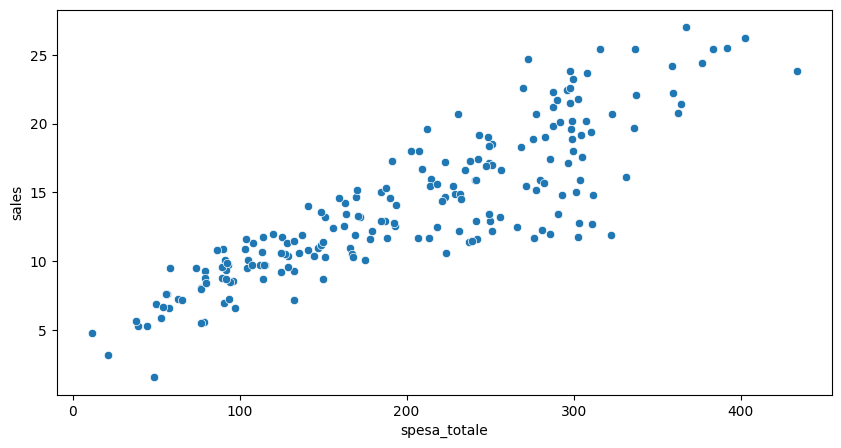

In [9]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = "spesa_totale", y = "sales", data = df)
scipy.stats.pearsonr(df["spesa_totale"], df["sales"])

Si vede che, nonostante ci sia molto rumore, sia lo scatterplot che il coefficiente di correlazione lineare, suggeriscono che sussiste una relazione fra la spesa totale e le vendite totali.

Notiamo che siamo in un caso di regressione lineare con **1 sola feature** e relativa variabile di output

# La retta di regressione lineare

Stiamo cercando di rispondere a un problema di **predizione**:
se spendo la somma $x_{tot}$ in pubblicità, quanto posso aspettarmi in vendite?

In [10]:
# variabile di input
X = df["spesa_totale"]

#variabile di output
y = df["sales"]

In [11]:
# usiamo la funzione di numpy np.polyfit
# help(np.polyfit)

In [12]:
# Warning: i coefficienti sono ordinati a partire da quello di grado maggiore
np.polyfit(X, y, 1)

array([0.04868788, 4.24302822])

In [13]:
# vettore spese - asse x
spesa = np.linspace(-50, 550, 100)

# vettore vendite potenziali - asse y
vendite_potenziali = 0.04868788*spesa + 4.24302822

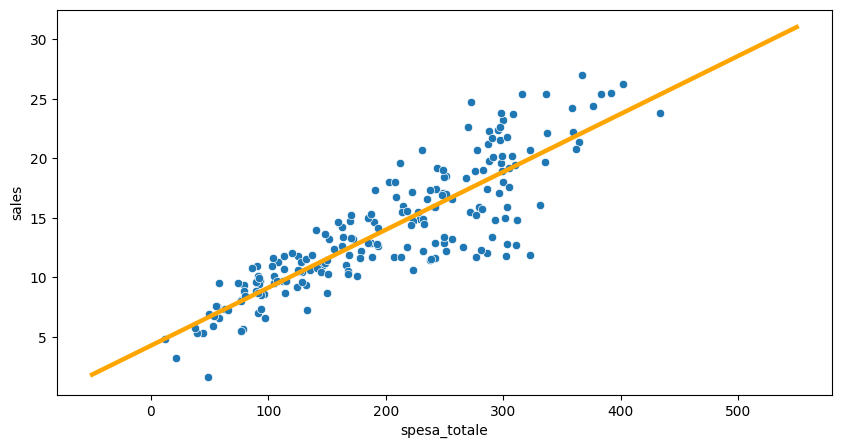

In [14]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = "spesa_totale", y = "sales", data = df)
plt.plot(spesa, vendite_potenziali, color = "orange", linewidth = 3.2)

In [15]:
# predizione 
spesa_totale = 250
vendite_predette = 0.04868788*spesa_totale + 4.24302822
vendite_predette

16.41499822

**Domanda**: abbiamo trovato la retta di best fit dei dati considerati. E' possibile approssimare l'andamento di questi considerando relazioni funzionali **non lineari** nelle features?

**Esempio**: consideriamo una relazione fino al quarto ordine, cioè:

$$
Y_i = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_4 x^4 \epsilon_i
$$

In [16]:
np.polyfit(X, y, 4)

array([-1.32539028e-09,  1.46034814e-06, -5.23540362e-04,  1.18664227e-01,
        1.51379069e+00])

In [17]:
vendite_ordine_4 = -1.32539028e-09*spesa**4 + 1.46034814e-06*spesa**3-5.23540362e-04*spesa**2 + 1.18664227e-01*spesa + 1.51379069e+00

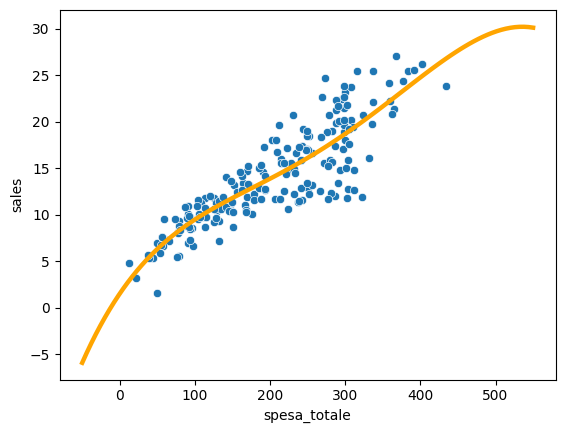

In [18]:
sns.scatterplot(x = "spesa_totale", y = "sales", data = df)
plt.plot(spesa, vendite_ordine_4, color = "orange", linewidth = 3.2)

**Domanda**: 
1. è migliore o peggiore di un approssimazione lineare?
2. come facciamo a misurare quanto buono è questo fit?
3. rischiamo di incappare nel bias vs. variance trade-off? rischiamo l'overfitting?

Se provassimo a usare polyfit 
Vedremo che nel caso di $n > 1$ features dobbiamo ricorrere alla libreria Scikit-Learn